In [64]:
import os, os.path, shutil
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
sess = tf.InteractiveSession()

c:\users\acalderon\opt\conda\envs\tensorflow\lib\site-packages\tensorflow\python\client\session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [6]:
path = Path("C:/Users/acalderon/Downloads/celeba-dataset/img_align_celeba")

print(len([x for x in path.iterdir()]))

202599


In [107]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [96]:
import pandas as pd
train_dir = Path("H:/data/Celeb/train")
attributes = Path("C:/Users/acalderon/Downloads/celeba-dataset/list_attr_celeba.csv")
i = 1
for filename, target in pd.read_csv(attributes).values[:5000,[0,3]]:
    if i%1000 == 0:
        print("{} is {}".format(filename, target))
    folder = "class2"
    if(target == 1):
        folder = "class1"
    shutil.copyfile(path / filename, train_dir / folder / filename)
    i = i + 1

001000.jpg is 1
002000.jpg is -1
003000.jpg is 1
004000.jpg is -1
005000.jpg is 1


In [95]:
i = 1
valid_dir = Path("H:/data/Celeb/valid")
attributes = Path("C:/Users/acalderon/Downloads/celeba-dataset/list_attr_celeba.csv")
for filename, target in pd.read_csv(attributes).values[5001:7500,[0,3]]:
    if i%1000 == 0:
        print("{} is {}".format(filename, target))
    folder = "class2"
    if(target == 1):
        folder = "class1"
    shutil.copyfile(path / filename, valid_dir / folder / filename)
    i = i + 1

006001.jpg is -1
007001.jpg is 1


In [97]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

valid_datagen = ImageDataGenerator(rescale=1./255)
valid_generator = valid_datagen.flow_from_directory(valid_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 5000 images belonging to 2 classes.
Found 2499 images belonging to 2 classes.


data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


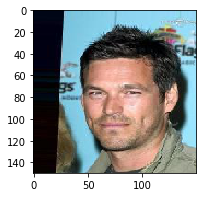

0.0


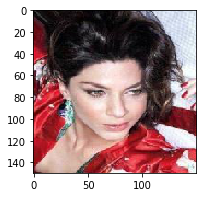

0.0


In [98]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    plt.imshow(data_batch[0])
    plt.show()
    print(labels_batch[0])
    plt.imshow(data_batch[1])
    plt.show()
    print(labels_batch[1])
    break

In [108]:
from keras import optimizers
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=valid_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 88s 878ms/step - loss: 0.6439 - acc: 0.6320 - val_loss: 0.6036 - val_acc: 0.6695
Epoch 2/30
100/100 [==============================] - 86s 864ms/step - loss: 0.5877 - acc: 0.6895 - val_loss: 0.5519 - val_acc: 0.7123
Epoch 3/30
100/100 [==============================] - 86s 864ms/step - loss: 0.5449 - acc: 0.7250 - val_loss: 0.5814 - val_acc: 0.6999
Epoch 4/30
100/100 [==============================] - 89s 886ms/step - loss: 0.5057 - acc: 0.7545 - val_loss: 0.5271 - val_acc: 0.7403
Epoch 5/30
100/100 [==============================] - 84s 841ms/step - loss: 0.4977 - acc: 0.7540 - val_loss: 0.5189 - val_acc: 0.7411
Epoch 6/30
100/100 [==============================] - 84s 839ms/step - loss: 0.4833 - acc: 0.7605 - val_loss: 0.5852 - val_acc: 0.7011
Epoch 7/30
100/100 [==============================] - 87s 865ms/step - loss: 0.4734 - acc: 0.7665 - val_loss: 0.4929 - val_acc: 0.7571
Epoch 8/30
100/100 [==============================] - 1

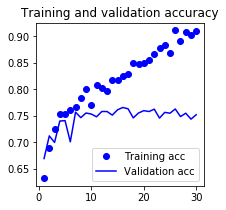

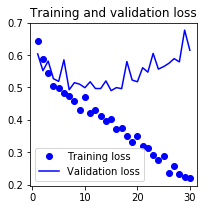

In [110]:
model.save('model.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [111]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:7]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
activations = activation_model.predict(img_tensor)

(1, 150, 150, 3)


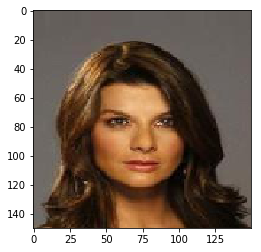

In [125]:
img_path = path / '000034.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
print(img_tensor.shape)
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(img_tensor[0])
plt.show()

In [148]:
img_tensor.shape

(1, 150, 150, 3)

In [147]:
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

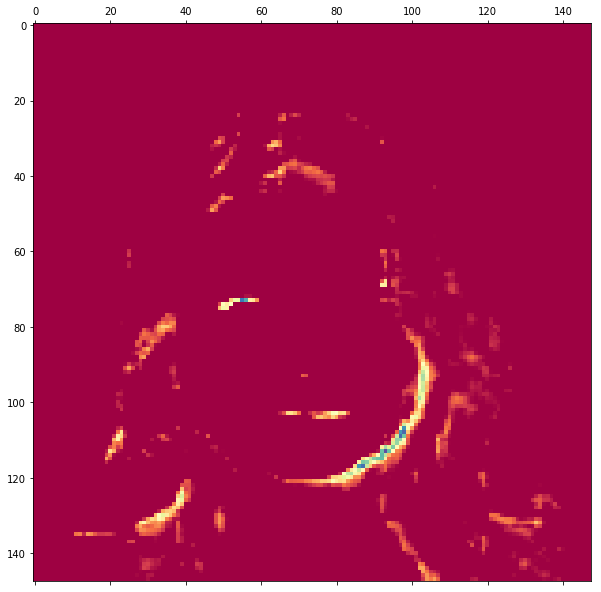

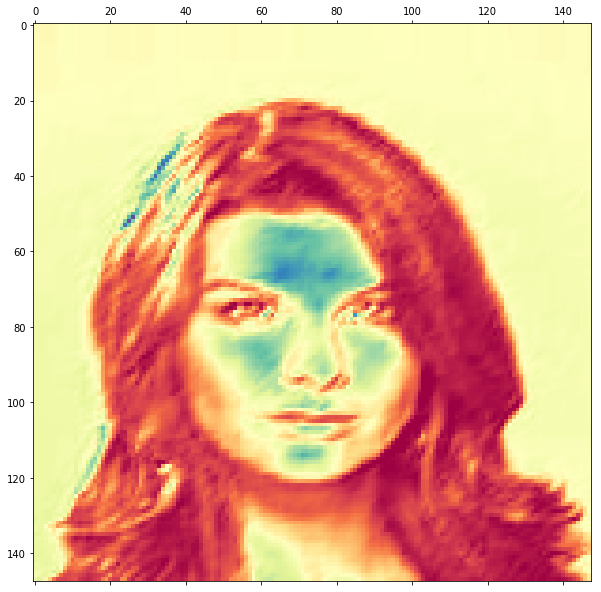

In [145]:
first_layer_activation = activations[0]
first_layer_activation.shape
plt.matshow(first_layer_activation[0, :, :, 4], cmap='Spectral')
plt.matshow(first_layer_activation[0, :, :, 6], cmap='Spectral')

c:\users\acalderon\opt\conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


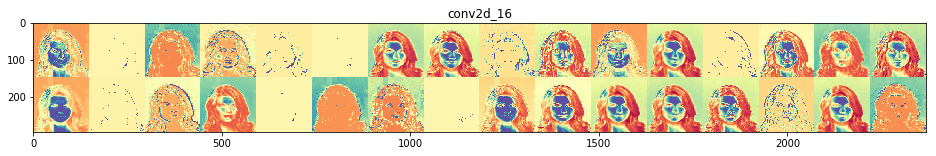

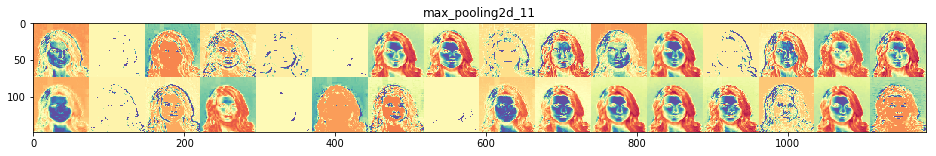

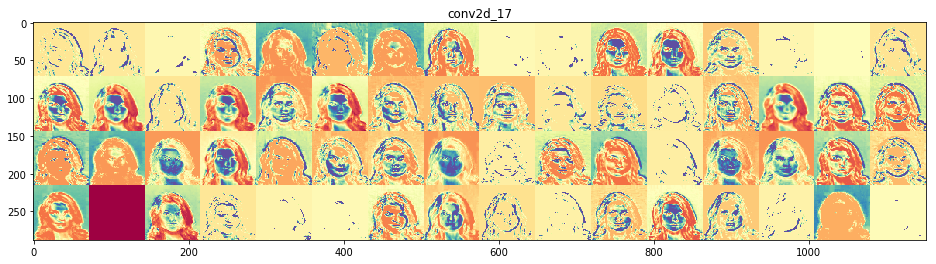

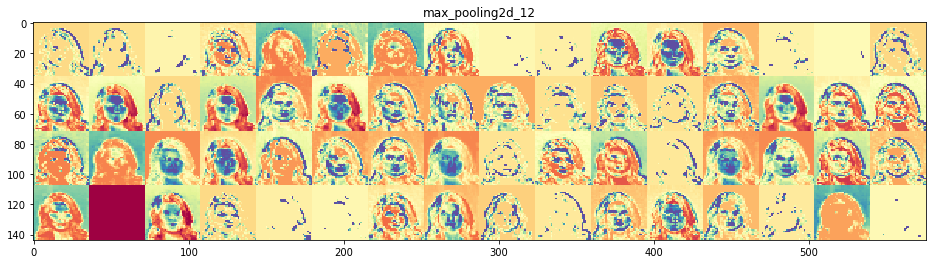

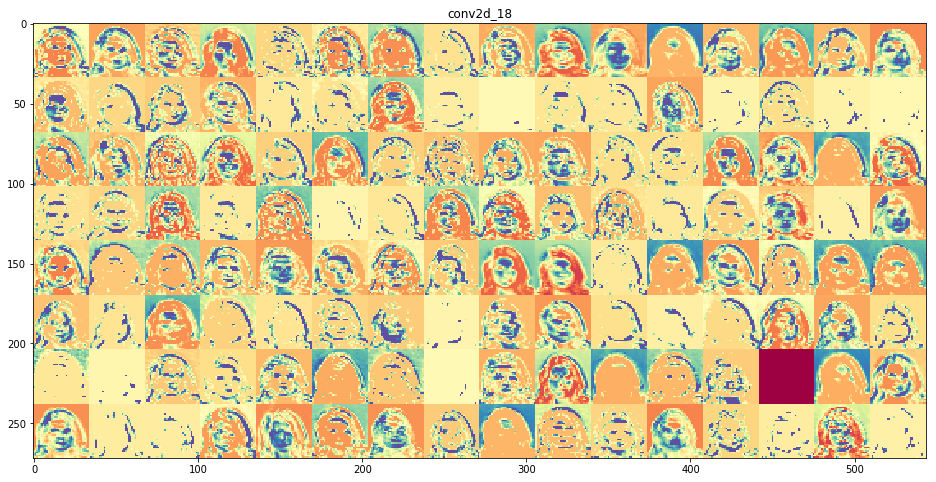

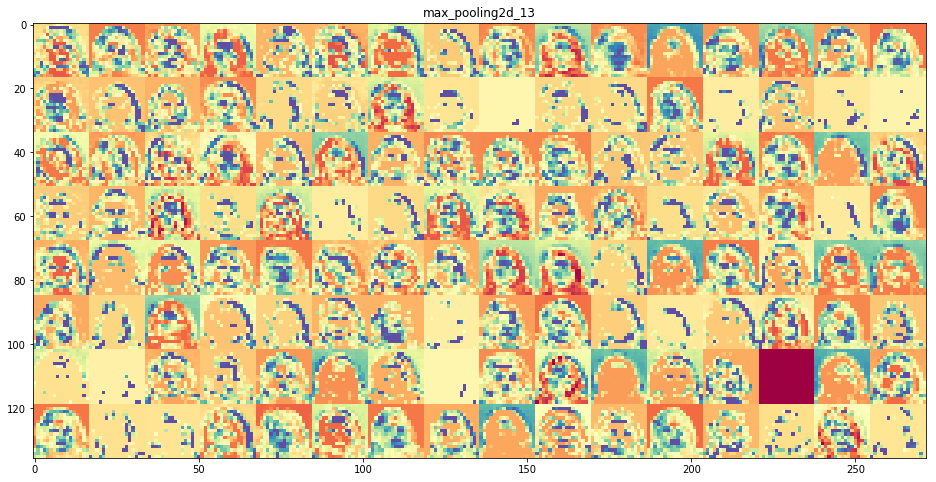

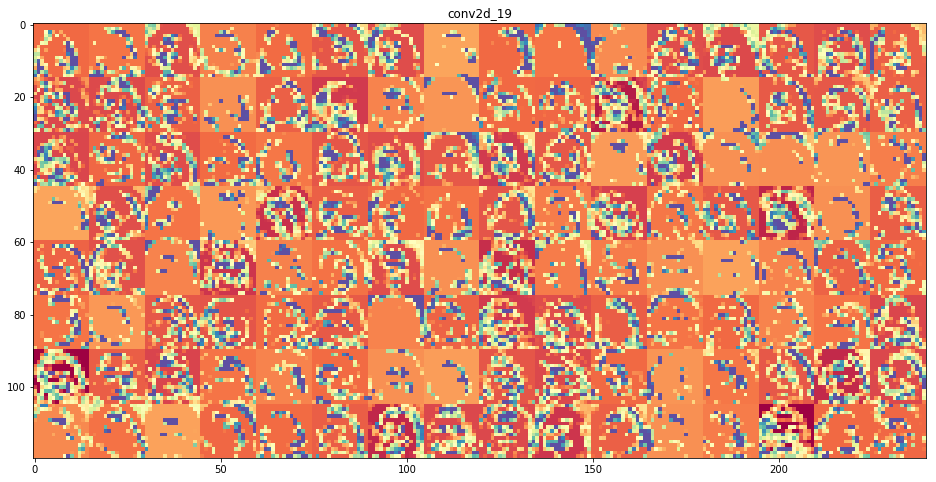

In [118]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='Spectral')

In [138]:
from keras import backend as K

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    img = input_img_data[0]
    return deprocess_image(img)


In [139]:
import matplotlib.gridspec as gridspec

def plotPattern(layer_name, rc = 3):
    plt.rcParams['figure.figsize'] = (2*rc,2*rc)
    gs = gridspec.GridSpec(rc, rc)
    for i in range(rc):
        for j in range(rc):
            plt.subplot(gs[i, j])
            plt.imshow(generate_pattern(layer_name, j + rc * i))
            plt.axis('off')


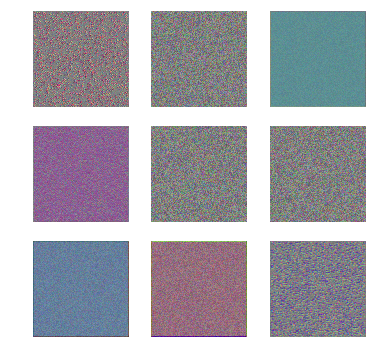

In [141]:
layer_name = 'conv2d_16'
rc = 3
plotPattern(layer_name, rc)

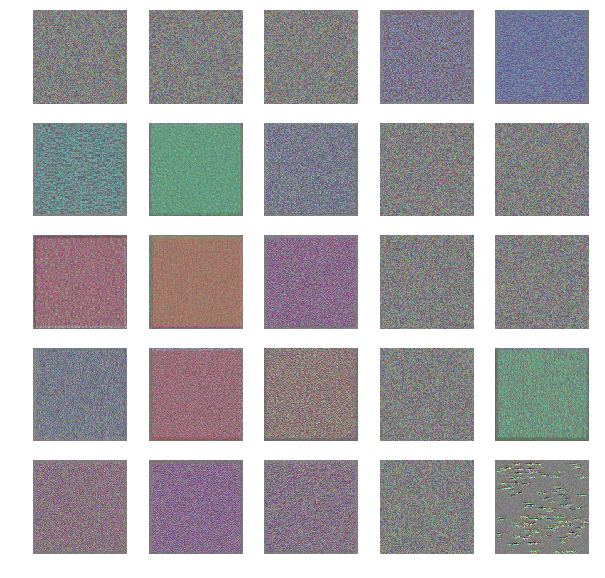

In [142]:
layer_name = 'conv2d_17'
rc = 5
plotPattern(layer_name, rc)

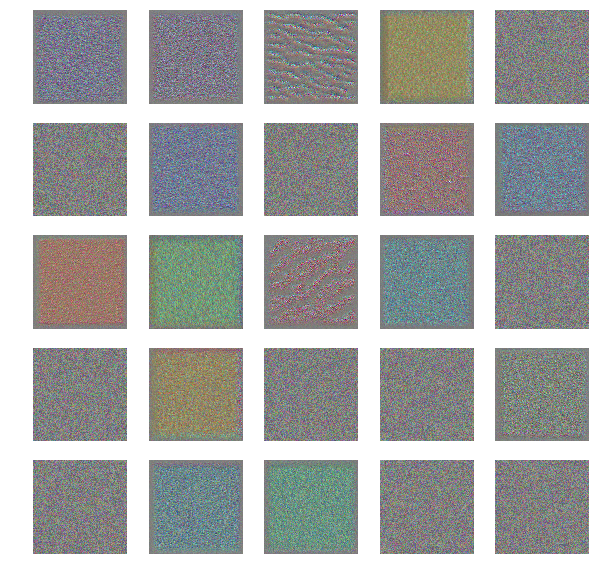

In [143]:
layer_name = 'conv2d_18'
rc = 5
plotPattern(layer_name, rc)

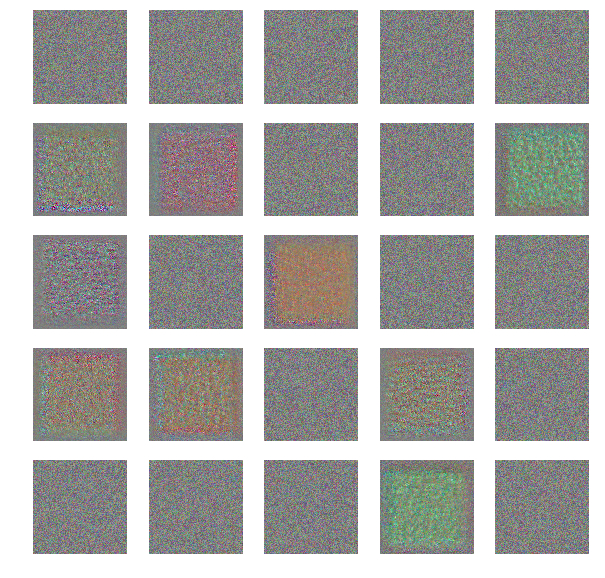

In [144]:
layer_name = 'conv2d_19'
rc = 5
plotPattern(layer_name, rc)